In [ ]:
!pip install pandas dask[complete] pyarrow

In [1]:
import dask.dataframe as dd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from tqdm import tqdm
from tqdm.dask import TqdmCallback

In [21]:
def convert_csv_to_parquet(url, output_dir):
    #output directory
    os.makedirs(output_dir, exist_ok=True)

    # Extracting file name and setting Parquet file path
    file_name = url.split("/")[-1].replace(".gzip", "")
    parquet_path = os.path.join(output_dir, file_name + ".parquet")

    # convert to Parquet
    ddf = dd.read_csv(url, compression='gzip', blocksize=None)
    ddf.to_parquet(parquet_path)

    print(f"Converted {file_name} to Parquet format and saved to {parquet_path}")

# CSV file URLs
file_urls = [
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000000.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000001.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000002.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000003.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000004.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000005.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000006.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000007.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000008.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000009.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000010.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000011.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000012.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000013.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000014.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000015.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000016.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000017.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000018.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000019.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000020.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000021.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000022.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000023.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000024.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000025.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000026.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000027.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000028.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000029.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000030.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000031.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000032.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000033.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000034.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000035.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000036.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000037.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000038.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000039.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000040.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000041.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000042.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000043.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000044.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000045.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000046.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000047.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000048.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000049.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000050.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000051.csv.gzip",
    "https://placedata.reddit.com/data/canvas-history/2023/2023_place_canvas_history-000000000052.csv.gzip"
]
output_parquet_dir = "/rplace/rplace_parquet"

for url in file_urls:
    convert_csv_to_parquet(url, output_parquet_dir)


Converted 2023_place_canvas_history-000000000001.csv to Parquet format and saved to /rplace/rplace_parquet\2023_place_canvas_history-000000000001.csv.parquet


In [6]:
!pip install tqdm

In [9]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [11]:
output_parquet_dir = "/rplace/rplace_parquet"

parquet_files = []
for root, dirs, files in os.walk(output_parquet_dir):
    for file in files:
        if file.endswith(".parquet"):
            parquet_files.append(os.path.join(root, file))

In [13]:
all_data = dd.read_parquet(parquet_files)

print(all_data.head())


                     timestamp  \
0  2023-07-20 13:00:26.088 UTC   
1  2023-07-20 13:00:43.658 UTC   
2  2023-07-20 13:00:43.705 UTC   
3  2023-07-20 13:01:02.487 UTC   
4  2023-07-20 13:01:40.445 UTC   

                                                user coordinate pixel_color  
0  no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...  -199,-235     #FFFFFF  
1  qJ7O6cuUNfkDyn+ZOEYR+UiVEmAu/vYfm/s4hK0XJytqAx...     0,-298     #FF4500  
2  uqi5XwkBePwcPKJgGOxHKzzzXuZKU6iKZT+OVfUJfaRKek...   -42,-218     #FFFFFF  
3  rgSTj7FHZUHsLXZLLNj9+vxibHIowb2+UhfFLDYgsVBXqI...  -418,-232     #B44AC0  
4  2bmivBNj8NYvnp/15k0EqC+75T1OxTtCUcRG2pf0c5btzF...    182,164     #FF4500  


In [14]:
# Dask computations
with TqdmCallback(desc="Compute unique users", total=len(all_data)):
    unique_users = all_data['user'].nunique().compute()
print(f"Unique Users: {unique_users}")

Compute unique users:   0%|          | 0/64 [00:00<?, ?it/s]

Unique Users: 8589732


In [15]:
with TqdmCallback(desc="Count pixel_color", total=len(all_data)):
    pixel_color_count = all_data['pixel_color'].count().compute()
print(pixel_color_count)

Count pixel_color:   0%|          | 0/55 [00:00<?, ?it/s]

134583993


In [16]:
with TqdmCallback(desc="Compute total pixels placed", total=len(all_data)):
    total_pixels_placed = all_data.shape[0].compute()
print(f"Total Pixels Placed: {total_pixels_placed}")

Compute total pixels placed:   0%|          | 0/112 [00:00<?, ?it/s]

Total Pixels Placed: 134583993


In [21]:
with TqdmCallback(desc="Compute most used colors", total=len(all_data)):
    most_used_colors = all_data['pixel_color'].value_counts().compute()
print(most_used_colors.head(32))

Compute most used colors:   0%|          | 0/62 [00:00<?, ?it/s]

#000000    29700429
#FFFFFF    28163141
#FF4500    18633451
#FFD635     9732229
#3690EA     7964702
#2450A4     5559074
#00A368     5122132
#FFA800     5057878
#FF99AA     2913962
#B44AC0     2619045
#D4D7D9     2600003
#BE0039     2563864
#51E9F4     2328028
#7EED56     2085052
#898D90     2038617
#9C6926     1789308
#811E9F     1193894
#6D482F      683935
#FF3881      559008
#00CC78      444408
#515252      438884
#FFB470      410331
#493AC1      397251
#FFF8B8      292106
#00756F      275618
#6D001A      265459
#6A5CFF      216133
#DE107F      182128
#009EAA      145749
#E4ABFF       86778
#94B3FF       61491
#00CCC0       59905
Name: pixel_color, dtype: int64


C:\Users\viswa\AppData\Local\Temp\ipykernel_6360\2780626194.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


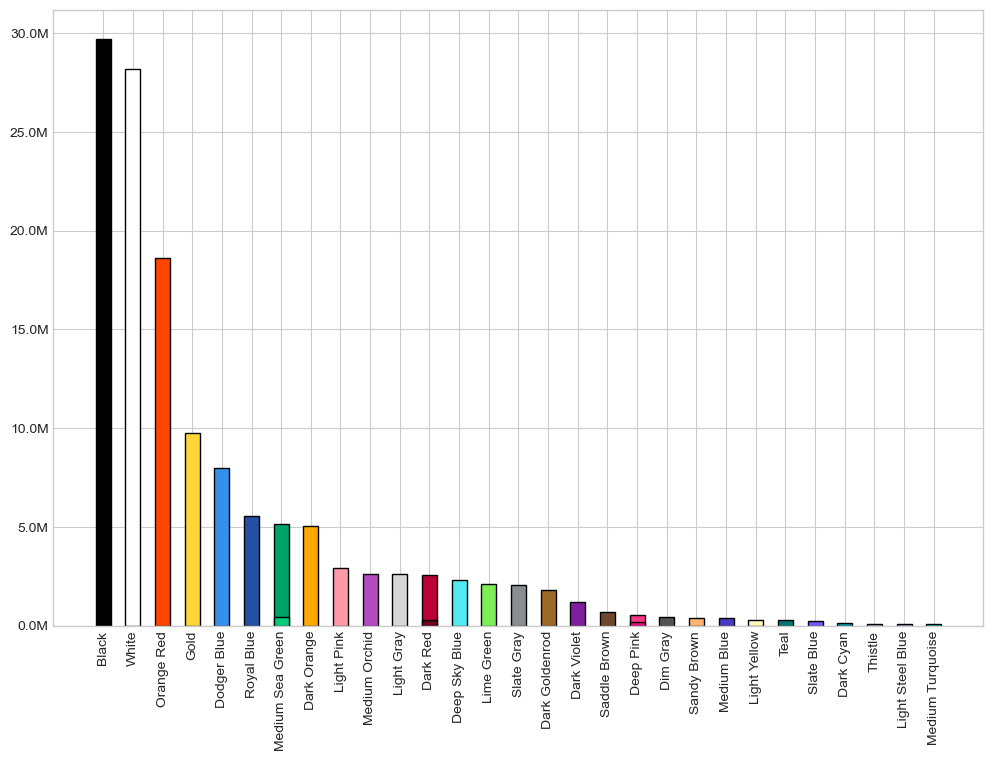

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Use a light theme
plt.style.use('seaborn-whitegrid')

# Set the figure size
plt.figure(figsize=(12, 8))

# Your data
colors = ['#000000', '#FFFFFF', '#FF4500', '#FFD635', '#3690EA', '#2450A4', '#00A368', '#FFA800', '#FF99AA', '#B44AC0', '#D4D7D9', '#BE0039', '#51E9F4', '#7EED56', '#898D90', '#9C6926', '#811E9F', '#6D482F', '#FF3881', '#00CC78', '#515252', '#FFB470', '#493AC1', '#FFF8B8', '#00756F', '#6D001A', '#6A5CFF', '#DE107F', '#009EAA', '#E4ABFF', '#94B3FF', '#00CCC0']
counts = [29700429, 28163141, 18633451, 9732229, 7964702, 5559074, 5122132, 5057878, 2913962, 2619045, 2600003, 2563864, 2328028, 2085052, 2038617, 1789308, 1193894, 683935, 559008, 444408, 438884, 410331, 397251, 292106, 275618, 265459, 216133, 182128, 145749, 86778, 61491, 59905]

# Color names or hex codes
color_names = ['Black', 'White', 'Orange Red', 'Gold', 'Dodger Blue', 'Royal Blue', 'Medium Sea Green', 'Dark Orange', 'Light Pink', 'Medium Orchid', 'Light Gray', 'Dark Red', 'Deep Sky Blue', 'Lime Green', 'Slate Gray', 'Dark Goldenrod', 'Dark Violet', 'Saddle Brown', 'Deep Pink', 'Medium Sea Green', 'Dim Gray', 'Sandy Brown', 'Medium Blue', 'Light Yellow', 'Teal', 'Dark Red', 'Slate Blue', 'Deep Pink', 'Dark Cyan', 'Thistle', 'Light Steel Blue', 'Medium Turquoise']

# Create bar graph with borders
plt.bar(color_names, counts, color=colors, edgecolor='black', width=0.5)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Format y-axis to display in millions
formatter = ticker.FuncFormatter(lambda x, pos: '%1.1fM' % (x * 1e-6))
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()


In [18]:
# Counting user actions with progress bar
with TqdmCallback(desc="Counting user actions"):
    user_action_count = all_data['user'].count().compute()
print(user_action_count)

Counting user actions:   0%|          | 0/55 [00:00<?, ?it/s]

134583993


In [19]:
with TqdmCallback(desc="Counting coordinates"):
    coord = all_data['coordinate'].value_counts().compute()

Counting coordinates:   0%|          | 0/62 [00:00<?, ?it/s]

In [ ]:
with TqdmCallback(desc="Counting unique colors"):
    all_color_count = all_data['coordinate'].nunique().compute()

print(coord)

In [11]:
coordinate_changes = all_data['coordinate'].value_counts()
top_10_coordinates = coordinate_changes.head(10).index.tolist()
#number of times they are changed
times_changed = coordinate_changes.head(10).values.tolist()

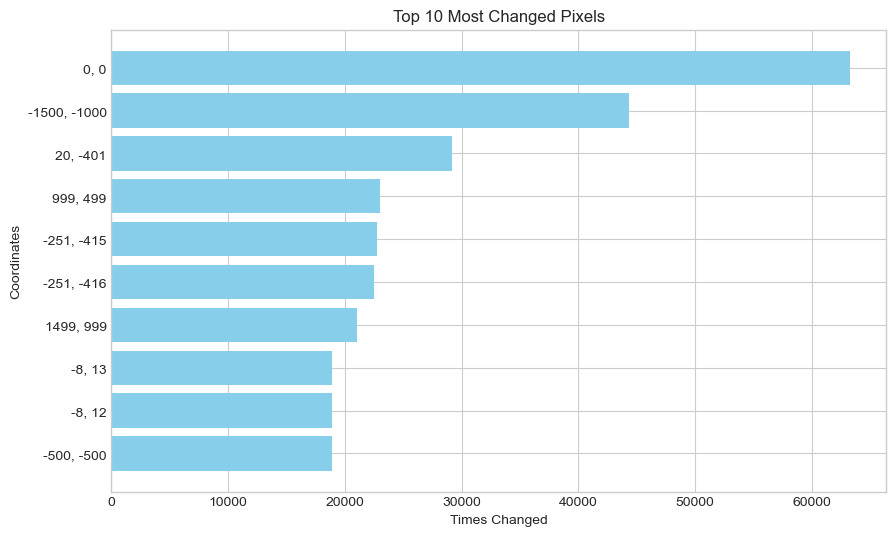

In [8]:
# Top 10 Most Changed Pixels
plt.figure(figsize=(10, 6))
plt.barh(top_10_coordinates, times_changed, color='skyblue')
plt.ylabel('Coordinates')
plt.xlabel('Times Changed')
plt.title('Top 10 Most Changed Pixels')
plt.gca().invert_yaxis()
plt.show()

In [22]:
with TqdmCallback(desc="Grouping by coordinate"):
    pixel_placement_counts = all_data.groupby('coordinate').size().compute()

untouched_pixels = pixel_placement_counts[pixel_placement_counts == 1]
untouched_pixel_coordinates = untouched_pixels.index.tolist()


num_untouched_pixels = len(untouched_pixel_coordinates)
print(f"Number of pixels placed once and never changed: {num_untouched_pixels}")

Grouping by coordinate:   0%|          | 0/62 [00:00<?, ?it/s]

Number of pixels placed once and never changed: 24299


In [23]:
from tqdm.dask import TqdmCallback
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert 'timestamp' to datetime
all_data['timestamp'] = dd.to_datetime(all_data['timestamp'])

# Compute user pixel counts
with TqdmCallback(desc="Computing user pixel counts"):
    user_pixel_counts = all_data.groupby('user').size().compute()

suspected_bots = user_pixel_counts[user_pixel_counts > 450]


Computing user pixel counts:   0%|          | 0/62 [00:00<?, ?it/s]

In [37]:
print(suspected_bots.describe())

count    8603.000000
mean      634.144484
std       245.513178
min       451.000000
25%       495.000000
50%       564.000000
75%       690.000000
max      7504.000000
dtype: float64


In [24]:
def analyze_user_intervals(user_data):
    user_data = user_data.sort_values('timestamp')
    time_diffs = user_data['timestamp'].diff().dropna()
    return pd.Series({'mean_interval': time_diffs.mean(), 'std_interval': time_diffs.std()})

meta = {'mean_interval': 'timedelta64[ns]', 'std_interval': 'timedelta64[ns]'}

In [ ]:
with TqdmCallback(desc="Computing interval analysis"):
    interval_analysis = all_data.groupby('user').apply(analyze_user_intervals, meta=meta).compute()

interval_analysis['std_interval_minutes'] = interval_analysis['std_interval'].dt.total_seconds() / 60

In [ ]:
with TqdmCallback(desc="Converting to Pandas DataFrame"):
    all_data_pd = all_data.compute()

suspected_bot_actions = all_data_pd[all_data_pd['user'].isin(suspected_bots.index)]
suspected_bot_actions.sort_values(['user', 'timestamp'], inplace=True)
suspected_bot_actions['time_diff'] = suspected_bot_actions.groupby('user')['timestamp'].diff()

print(suspected_bot_actions.groupby('user')['time_diff'].describe())

In [ ]:
suspected_bot_actions['time_diff_seconds'] = suspected_bot_actions['time_diff'].dt.total_seconds()
interval_stats = suspected_bot_actions.groupby('user')['time_diff_seconds'].agg(['mean', 'std'])

interval_stats['std_minutes'] = interval_stats['std'] / 60

plt.figure(figsize=(10, 6))
interval_stats['std_minutes'].hist(bins=50, color='blue', edgecolor='black')
plt.title('Standard Deviation of Time Intervals for Suspected Bots')
plt.xlabel('Standard Deviation of Intervals (minutes)')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
with TqdmCallback(desc="Computing pixel placement counts"):
    pixel_placement_counts = all_data.groupby('coordinate').size().compute()

untouched_pixels = pixel_placement_counts[pixel_placement_counts == 1]
untouched_pixel_coordinates = untouched_pixels.index.tolist()

print(f"Number of pixels placed once and never changed: {len(untouched_pixel_coordinates)}")
print("Sample of untouched pixel coordinates:", untouched_pixel_coordinates[:10])

In [ ]:
bot_pixel_coords = suspected_bot_actions['coordinate'].value_counts()

top_bot_coords = bot_pixel_coords.head(10)
print("Top 10 coordinates most affected by bots:", top_bot_coords)

In [ ]:
final_bot_actions = suspected_bot_actions.groupby('user').apply(lambda x: x.sort_values(by='timestamp').iloc[-1])

common_coords = final_bot_actions['coordinate'].value_counts().head(10)
common_colors = final_bot_actions['pixel_color'].value_counts().head(10)

user_pixel_counts = final_bot_actions.groupby('user').size()

# Filter out users with 10 or fewer pixel placements
active_users = user_pixel_counts[user_pixel_counts > 10].index
final_bot_actions_filtered = final_bot_actions[final_bot_actions['user'].isin(active_users)]

In [ ]:
def plot_bot_impact(actions):
    canvas = np.zeros((1000, 1000, 3), dtype=np.uint8)
    for index, row in actions.iterrows():
        coords = row['coordinate'].split(',')
        if len(coords) != 2:
            continue
        x, y = map(int, coords)
        color_hex = row['pixel_color'].lstrip('#')
        color_hex = '{:0>6}'.format(color_hex)
        color = tuple(int(color_hex[i:i+2], 16) for i in (0, 2, 4))
        canvas[y, x] = color
    
    plt.figure(figsize=(10, 10))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

plot_bot_impact(final_bot_actions_filtered)

In [ ]:
# Plotting the hourly activity using the filtered data
final_bot_actions_filtered['hour'] = final_bot_actions_filtered['timestamp'].dt.hour
hourly_activity = final_bot_actions_filtered.groupby('hour').size()
hourly_activity.plot(kind='bar', figsize=(10, 6))
plt.title('Bot Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pixels Placed')
plt.xticks(rotation=0)
plt.show()

In [ ]:
human_actions = all_data[~all_data['user'].isin(suspected_bot_actions['user'].unique())]
human_actions['timestamp'] = dd.to_datetime(human_actions['timestamp'])
human_actions['hour'] = human_actions['timestamp'].dt.hour

with TqdmCallback(desc="Computing human activity by hour"):
    activity_by_hour_human = human_actions.groupby('hour').size().compute()

activity_by_hour_human.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Human Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pixels Placed')
plt.xticks(rotation=0)
plt.show()

In [ ]:
with TqdmCallback(desc="Computing most used colors by humans"):
    most_used_colors_human = human_actions['pixel_color'].value_counts().compute().head(10)

most_used_colors_human.plot(kind='bar', color='purple')
plt.title('Top 10 Most Used Colors by Humans')
plt.xlabel('Color')
plt.ylabel('Usage Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(activity_by_hour_human.index, activity_by_hour_human, label='Humans', color='green')
plt.plot(hourly_activity.index, hourly_activity, label='Bots', color='red')
plt.title('Human vs Bot Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pixels Placed')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [ ]:
all_data['timestamp'] = dd.to_datetime(all_data['timestamp'])
all_data['hour'] = all_data['timestamp'].dt.hour

# Count pixel placements by hour
activity_by_hour = all_data.groupby('hour').size().compute()
print(all_data['hour'].value_counts().compute())

# Plot
activity_by_hour.plot(kind='bar', title='Activity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pixels Placed')
plt.show()